# Busola Tega Adeaga
Student Number: 23027137

----
----

## Classification of Moons Dataset

The purpose of this classification algorithm is to be able to categorise the Moons dataset
using the supervised machine learning algorithms of Support Vector Machine (SVM) and Logistics Regression.

In [1]:
# Import all libaries required for Supervised Algorithms and the moons dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import auc
from sklearn.metrics import f1_score

In [2]:
# Generating the moons dataset with 10,000 samples, 30% noise, and setting the random seed for reproducibility
X, y = make_moons(n_samples=10000, noise=0.3, random_state=42)

In [3]:
# Split dataset into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Initialize a StandardScaler object for standardizing features
scaler = StandardScaler()

# Fit and transform the training features to standardize them
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing features using the same scaler to maintain consistency
X_test_scaled = scaler.transform(X_test)

------------------------------------------------------------------------------------------
-----------------------

### Support Vector Machine (SVM)

In [5]:
# Initialize a Support Vector Machine (SVM) classifier with specified parameters
svm_classifier = SVC(kernel='rbf', gamma='scale', probability=True, random_state=42)

# Train the SVM classifier using the standardized training data
svm_classifier.fit(X_train_scaled, y_train)

# Make predictions on the standardized testing data using the trained SVM classifier
svm_predictions = svm_classifier.predict(X_test_scaled)

# Calculate accuracy of the SVM classifier
svm_accuracy = round(accuracy_score(y_test, svm_predictions), 2)

# Calculate precision of the SVM classifier
svm_precision = round(precision_score(y_test, svm_predictions), 2)

# Calculate recall of the SVM classifier
svm_recall = round(recall_score(y_test, svm_predictions), 2)

# Calculate mean squared error (MSE) of the SVM classifier
svm_mse = mean_squared_error(y_test, svm_predictions)

# Generate predicted probabilities for positive class (class 1) using the SVM classifier
svm_probs = svm_classifier.predict_proba(X_test_scaled)[:, 1]

# Calculate the area under the ROC curve (ROC AUC) of the SVM classifier
svm_roc_auc = round(roc_auc_score(y_test, svm_probs), 2)

# Compute the false positive rate (fpr) and true positive rate (tpr) for ROC curve of the SVM classifier
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)

-------------

### Logistic Regression

In [6]:
# Initialize a Logistic Regression classifier with specified parameters
logistic_regression = LogisticRegression(random_state=42)

# Train the Logistic Regression classifier using the standardized training data
logistic_regression.fit(X_train_scaled, y_train)

# Make predictions on the standardized testing data using the trained Logistic Regression classifier
logistic_predictions = logistic_regression.predict(X_test_scaled)

# Calculate accuracy of the Logistic Regression classifier
logistic_accuracy = round(accuracy_score(y_test, logistic_predictions), 2)

# Calculate precision of the Logistic Regression classifier
logistic_precision = round(precision_score(y_test, logistic_predictions), 2)

# Calculate recall of the Logistic Regression classifier
logistic_recall = round(recall_score(y_test, logistic_predictions), 2)

# Calculate mean squared error (MSE) of the Logistic Regression classifier
logistic_mse = mean_squared_error(y_test, logistic_predictions)

# Generate predicted probabilities for positive class (class 1) using the Logistic Regression classifier
logistic_probs = logistic_regression.predict_proba(X_test_scaled)[:, 1]

# Calculate the area under the ROC curve (ROC AUC) of the Logistic Regression classifier
logistic_roc_auc = round(roc_auc_score(y_test, logistic_probs), 2)

# Compute the false positive rate (fpr) and true positive rate (tpr) for ROC curve of the Logistic Regression classifier
logistic_fpr, logistic_tpr, _ = roc_curve(y_test, logistic_probs)

----------------------------

### Performance Metrics

In [7]:
# Print out of the SVM evaluation metrics: Mean Squared Error, Accuracy, Precision, Recall, and ROC 
print("Support Vector Machine (SVM) Metrics:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("Mean Squared Error:", svm_mse)
print("ROC AUC Score:", svm_roc_auc)

print('-----------------------------------------------------------------')

# Print out of the Logistics Regression evaluation metrics: Mean Squared Error, Accuracy, Precision, Recall, and ROC 
print("Logistic Regression Metrics:")
print("Accuracy:", logistic_accuracy)
print("Precision:", logistic_precision)
print("Recall:", logistic_recall)
print("Mean Squared Error:", logistic_mse)
print("ROC AUC Score:", logistic_roc_auc)

Support Vector Machine (SVM) Metrics:
Accuracy: 0.93
Precision: 0.92
Recall: 0.93
Mean Squared Error: 0.0725
ROC AUC Score: 0.97
-----------------------------------------------------------------
Logistic Regression Metrics:
Accuracy: 0.87
Precision: 0.86
Recall: 0.87
Mean Squared Error: 0.1315
ROC AUC Score: 0.95


___________________________________________________

### Cross Validation

In [8]:
# Define the number of folds for cross-validation
n_folds = 10

# Initialize KFold for cross-validation
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

In [9]:
# Cross-validation for SVM classifier
svm_probs_cv = cross_val_predict(svm_classifier, X, y, cv=kf, method='predict_proba')
svm_fpr_cv, svm_tpr_cv, _ = roc_curve(y, svm_probs_cv[:, 1])

# Cross-validation for Logistic Regression classifier
logistic_probs_cv = cross_val_predict(logistic_regression, X, y, cv=kf, method='predict_proba')
logistic_fpr_cv, logistic_tpr_cv, _ = roc_curve(y, logistic_probs_cv[:, 1])

# Calculate Precision-Recall curve for SVM classifier
svm_precision_cv, svm_recall_cv, _ = precision_recall_curve(y, svm_probs_cv[:, 1])

# Calculate Precision-Recall curve for Logistic Regression classifier
logistic_precision_cv, logistic_recall_cv, _ = precision_recall_curve(y, logistic_probs_cv[:, 1])

-------------------------------------------------------------------------------------------------------------------

### ROC Curve SVM

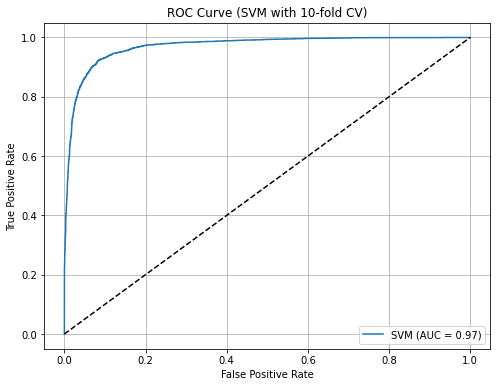

In [10]:
# Plot ROC curve for SVM classifier with cross-validation
plt.figure(figsize=(8, 6))
plt.plot(svm_fpr_cv, svm_tpr_cv, label='SVM (AUC = {:.2f})'.format(roc_auc_score(y, svm_probs_cv[:, 1])))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (SVM with 10-fold CV)')
plt.legend()
plt.grid(True)
plt.show()

--------------------

### ROC Curve Logistic Regression

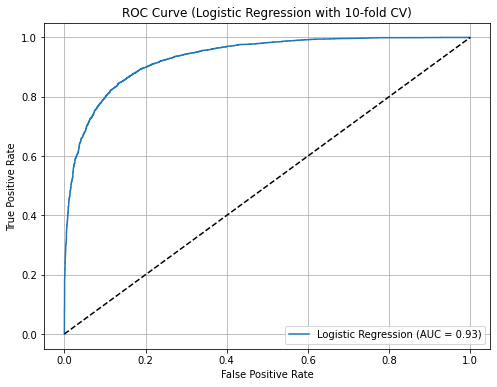

In [11]:
# Plot ROC curve for Logistic Regression classifier with cross-validation
plt.figure(figsize=(8, 6))
plt.plot(logistic_fpr_cv, logistic_tpr_cv, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_score(y, logistic_probs_cv[:, 1])))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Logistic Regression with 10-fold CV)')
plt.legend()
plt.grid(True)
plt.show()

-----------------

### Precision Recall Curve - SVM 

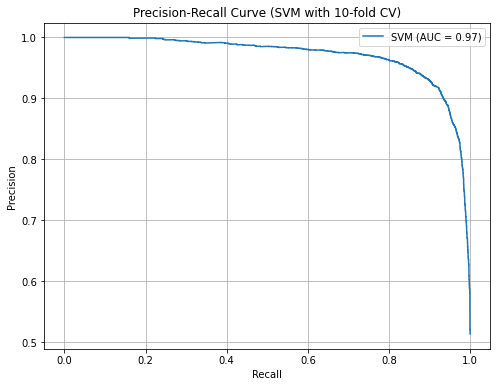

In [12]:
# Plot Precision-Recall curve for SVM classifier with cross-validation
plt.figure(figsize=(8, 6))
plt.plot(svm_recall_cv, svm_precision_cv, label='SVM (AUC = {:.2f})'.format(auc(svm_recall_cv, svm_precision_cv)))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (SVM with 10-fold CV)')
plt.legend()
plt.grid(True)
plt.show()

---------------------------

### Precision Recall Curve - Logistics Regression

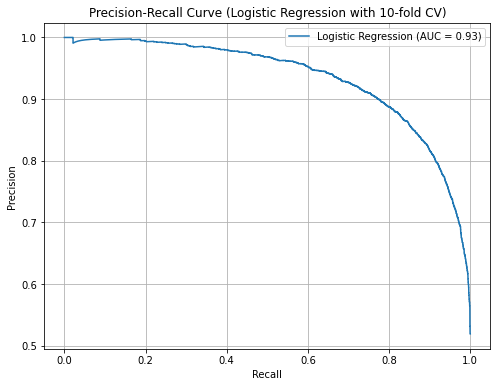

In [13]:
# Plot Precision-Recall curve for Logistic Regression classifier with cross-validation
plt.figure(figsize=(8, 6))
plt.plot(logistic_recall_cv, logistic_precision_cv, label='Logistic Regression (AUC = {:.2f})'.format(auc(logistic_recall_cv, logistic_precision_cv)))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Logistic Regression with 10-fold CV)')
plt.legend()
plt.grid(True)
plt.show()

-----------------------------

## F1 Score

In [14]:
# Calculate F1 score for SVM classifier
svm_f1_score = f1_score(y, svm_classifier.predict(X))

# Calculate F1 score for Logistic Regression classifier
logistic_f1_score = f1_score(y, logistic_regression.predict(X))

print("F1 Score (SVM): {:.2f}".format(svm_f1_score))
print("F1 Score (Logistic Regression): {:.2f}".format(logistic_f1_score))


F1 Score (SVM): 0.77
F1 Score (Logistic Regression): 0.85


----------------------------------------------------------------------------------------------------------------------
-----

# Additional Analysis

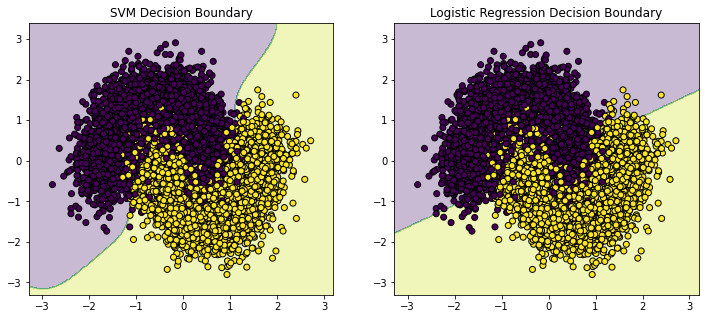

In [15]:
def plot_decision_boundary(classifier, X, y):
    # Define the step size for the meshgrid
    h = 0.02
    
    # Calculate the minimum and maximum values of the features for plotting boundaries
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    
    # Create a meshgrid of points based on feature ranges
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Use the classifier to predict the class labels for each point in the meshgrid
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Reshape the predicted class labels to match the shape of the meshgrid
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundaries using filled contours
    plt.contourf(xx, yy, Z, alpha=0.3)
    
    # Plot the data points
    plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolor='k')

plt.figure(figsize=(12, 5))

# Plot decision boundary for SVM classifier
plt.subplot(1, 2, 1)
plot_decision_boundary(svm_classifier, X_train_scaled, y_train)
plt.title("SVM Decision Boundary")

# Plot decision boundary for Logistic Regression classifier
plt.subplot(1, 2, 2)
plot_decision_boundary(logistic_regression, X_train_scaled, y_train)
plt.title("Logistic Regression Decision Boundary")

# Display the plot
plt.show()